In [5]:
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt

dir_path='C:/Users/User/Documents/application_train.csv'
f_train=os.path.join(dir_path)
app_train=pd.read_csv(f_train)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# 檢查每一個column
for col in app_train:
    if app_train[col].dtype=='object':
# 如果只有兩種值的類別行欄位
        if len(list(app_train[col].unique()))<=2:
# 作label encoder，以加入相關係數檢查
            app_train[col]=le.fit_transform(app_train[col])
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# 針對異常值資料，新增一個欄位紀錄，並將異常值轉為null
app_train['DAYS_BIRHT_ANOM']=app_train['DAYS_BIRTH']==365243
app_train['DAYS_BIRTH'].replace({365243:np.nan},inplace=True)
# DAYS_BIRTH取絕對值
app_train['DAYS_BIRTH']=abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRHT_ANOM']

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Name: DAYS_BIRHT_ANOM, Length: 307511, dtype: bool

In [8]:
print('correlation between TARGET and DAYS_BIRTH',app_train['DAYS_BIRTH'].corr(app_train['TARGET']))
(app_train['DAYS_BIRTH']/365).describe()

correlation between TARGET and DAYS_BIRTH -0.07823930830982709


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [9]:
# 將年齡相關資料儲存為另一個dataframe
age_data=app_train[['TARGET','DAYS_BIRTH']]
age_data['YEARS_BIRTH']=age_data['DAYS_BIRTH']/365

# 將年齡離散化並分組
age_data['YEARS_BIN']=pd.cut(age_data['YEARS_BIRTH'],bins=np.linspace(20,70,num=11))
age_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_8588\3563457718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH']=age_data['DAYS_BIRTH']/365
C:\Users\User\AppData\Local\Temp\ipykernel_8588\3563457718.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIN']=pd.cut(age_data['YEARS_BIRTH'],bins=np.linspace(20,70,num=11))


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BIN
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


In [10]:
# 依照年齡組別，分別計算平均值
age_group=age_data.groupby('YEARS_BIN').mean()
age_group

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BIN,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


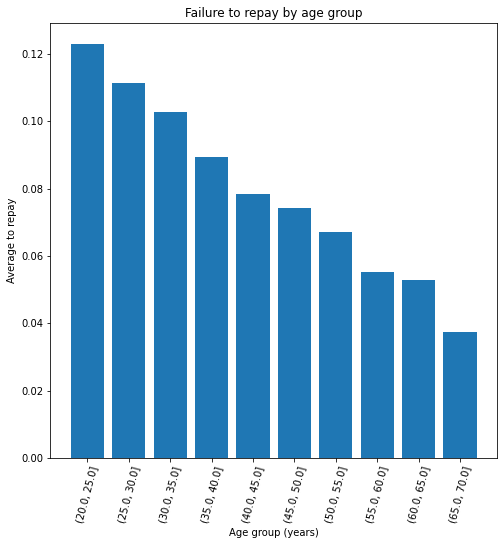

In [12]:
# 繪製常條圖表式資料分布
plt.figure(figsize=(8,8))
plt.bar(range(len(age_group.index)),age_group['TARGET'])
plt.xticks(range(len(age_group.index)),age_group.index,rotation=75);
plt.xlabel('Age group (years)');
plt.ylabel('Average to repay');        
plt.title('Failure to repay by age group');    